In [122]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

In [123]:
import pandas as pd

iris=load_iris()
iris_data=iris.data

iris_label=iris.target
print('iris target 값:', iris_label)
print('iris target명 :' ,iris.target_names)

iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [124]:
X_train,X_test,Y_train,Y_test=train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)

In [125]:
df_clf=DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=11)

In [126]:
pred=df_clf.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:4f}'.format(accuracy_score(Y_test,pred)))

예측 정확도: 0.933333


In [128]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris() 
dt_clf = DecisionTreeClassifier() 
train_data = iris.data 
train_label = iris.target 
dt_clf.fit(train_data, train_label) 
# 학습 데이터 세트으로 예측 수행 
pred = dt_clf.predict(train_data) 
print( '예측 정확도:', accuracy_score(train_label, pred)) 

예측 정확도: 1.0


In [129]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 

dt_clf=DecisionTreeClassifier()
iris_data=load_iris()
X_train,X_test,Y_train,Y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.3,random_state=121)

dt_clf.fit(X_train,Y_train)
pred=dt_clf.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(Y_test,pred)))

예측 정확도:0.9556


In [130]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold 
import numpy as np

iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

n_iter=0;

kfold=KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기: ',features.shape[0])
for train_index,test_index in kfold.split(features):
    X_train,X_test=features[train_index],features[test_index]
    Y_train,Y_test=label[train_index],label[test_index]
    dt_clf.fit(X_train,Y_train)

    pred=dt_clf.predict(X_test)
    n_iter+=1;

    accuracy=np.round(accuracy_score(Y_test,pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기 : {3}'
.format(n_iter, accuracy , train_size, test_size)) 
    print('#{0} 검증 세트 인텍스: {1}'.format(n_iter, test_index)) 
cv_accuracy.append(accuracy)
print("\n## 평균 검증 정확도: " , np.mean(cv_accuracy))

붓꽃 데이터 세트 크기:  150

#1 교차 검증 정확도 : 1.0, 학습 데이터 크기: 120, 검증 데이터 크기 : 30
#1 검증 세트 인텍스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기 : 30
#2 검증 세트 인텍스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기 : 30
#3 검증 세트 인텍스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기 : 30
#4 검증 세트 인텍스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기 : 30
#5 검증 세트 인텍스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도:  0.7333


In [131]:
import pandas as pd

iris =load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [132]:
kfold = KFold(n_splits=3)
n_iter=0
for train_index,test_index in kfold.split(iris_df):
    n_iter+=1
    label_train= iris_df['label'].iloc[train_index] 
    label_test= iris_df['label'].iloc[test_index] 
    print('## 교차 검증: {0}'.format (n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts()) 
    print('검증 레이블 데이터 분포:\n ', label_test.value_counts()) 

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
  label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
  label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
  label
2    50
Name: count, dtype: int64


In [133]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold 
import numpy as np
dt_clf=DecisionTreeClassifier(random_state=156)
skfold=StratifiedKFold(n_splits=3)
n_iter=0
cy_accuracy=[]
for train_index,test_index in skfold.split(features,label):
    X_train,X_test=features[train_index], features[test_index]
    Y_train,Y_test= label[train_index], label[test_index]
    dt_clf.fit(X_train,Y_train)
    pred=dt_clf.predict(X_test)

    n_iter+=1
    accuracy=np.round(accuracy_score(Y_test,pred),4)
    train_size = X_train.shape[0] 
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1},학습 데이터 크기: {2}, 검증 데이터 크기:{3}'.format(n_iter,accuracy,train_size,test_size))
    print('#{0} 검증 세트 인덱스 {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:',np.round(cv_accuracy,4))
print('\n## 평균 검증별 정확도:',np.round(np.mean(cv_accuracy),4))



#1 교차 검증 정확도: 0.98,학습 데이터 크기: 100, 검증 데이터 크기:50
#1 검증 세트 인덱스 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94,학습 데이터 크기: 100, 검증 데이터 크기:50
#2 검증 세트 인덱스 [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98,학습 데이터 크기: 100, 검증 데이터 크기:50
#3 검증 세트 인덱스 [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.7333 0.98   0.94   0.98  ]

## 평균 검증별 정확도: 0.9083


In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.datasets import load_iris

iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

scores=cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)
print('교차 검증별 정확도: ',np.round(scores,4))
print('평균 검증 정확도: ',np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


In [135]:
grid_parameters={'max_depth':[1,2,3],
                'min_samples_split':[2,3]
                }
grid_parameters

{'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

In [136]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
iris_data=load_iris()
X_train,X_test,Y_train,Y_test =train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=121)

dtree=DecisionTreeClassifier()

parameters={'max_depth':[1,2,3],
                'min_samples_split':[2,3]
                }
grid_dtree=GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True)
grid_dtree.fit(X_train,Y_train)

scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [137]:
print('GridSearchCV 최적 피라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 피라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.975000


In [138]:
estimator=grid_dtree.best_estimator_
pred=estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0: .4f}' .format(accuracy_score(Y_test, pred)))

테스트 데이터 세트 정확도:  0.9667


In [139]:
from sklearn.preprocessing import LabelEncoder
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder =LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값: ',labels)
print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 변환값:  [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [140]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
items=np.array(items).reshape(-1,1)

oh_encoder=OneHotEncoder()
oh_encoder.fit(items)
oh_labels=oh_encoder.transform(items)

print('원 - 핫 인코딩 데이터')
print(oh_labels.toarray())
print('원 - 핫 인코딩 데이터 차원')
print(oh_labels.shape)

원 - 핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원 - 핫 인코딩 데이터 차원
(8, 6)


In [141]:
df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [142]:
from sklearn.datasets import load_iris
import pandas as pd

iris =load_iris()
iris_data = iris.data
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [143]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)

print('feature 들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature 들의 최댓값')
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [145]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

scaler=MinMaxScaler()

scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train_array 데이터: ',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터: ',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터:  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [146]:
scaler.fit(test_array)
test_scaled=scaler.transform(test_array)

print('원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [148]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [149]:
titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'].fillna('N')
titanic_df['Embarked'].fillna('N')
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  866


In [150]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [151]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    NaN
1      C
2    NaN
Name: Cabin, dtype: object


In [152]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

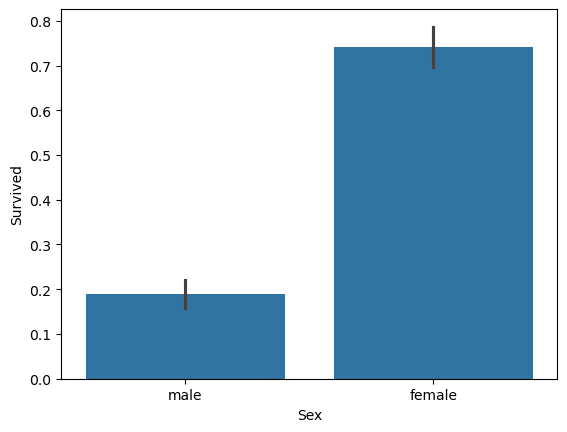

In [153]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

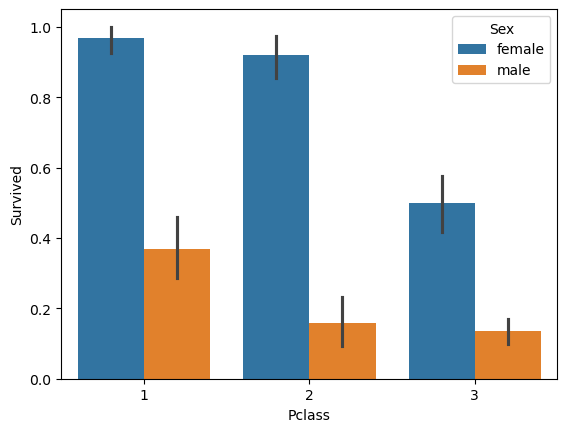

In [154]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

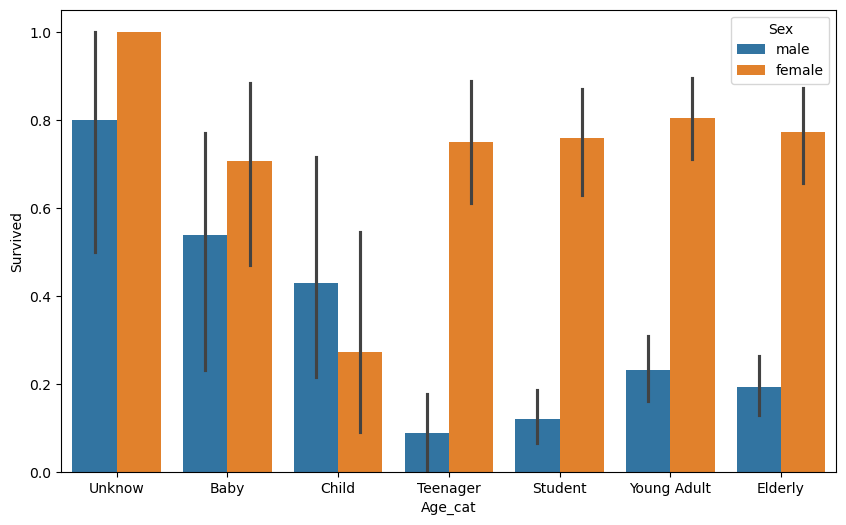

In [155]:
def get_category(age):
    cat=''
    if age<=1: cat='Unknow'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Elderly'
    
    return cat

plt.figure(figsize=(10,6))

group_names=['Unknow','Baby','Child','Teenager','Student','Young Adult','Elderly']

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [156]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])

    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


In [181]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [182]:
titanic_df=pd.read_csv('./titanic_train.csv')
y_titanic_df=titanic_df['Survived']
x_titanic_df=titanic_df.drop('Survived',axis=1)

x_titanic_df=transform_features(x_titanic_df)

C:\Users\songsyl\AppData\Local\Temp\ipykernel_5356\340051843.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\songsyl\AppData\Local\Temp\ipykernel_5356\340051843.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=11) 

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression(solver='liblinear')

dt_clf.fit(X_train, Y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:4f}'.format(accuracy_score(Y_test,dt_pred)))

rf_clf.fit(X_train, Y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:4f}'.format(accuracy_score(Y_test,dt_pred)))

lr_clf.fit(X_train, Y_train)
lr_pred=lr_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:4f}'.format(accuracy_score(Y_test,dt_pred)))

ValueError: could not convert string to float: 'Vander Planke, Mr. Leo Edmondus'

In [ ]:
from sklearn.model_selection import KFold
def exec_kfold(clf,folds=5):
    kfold=KFold(n_splits=folds)
    score=[]

    for iter_count,(train_index,test_index) in enumerate(kfold.split(x_titanic_df)):
        X_train,X_test=x_titanic_df.values[train_index],y_titanic_df.values[train_index]
        y_train,y_test=x_titanic_df.values[train_index],y_titanic_df.values[train_index]

        clf.fit(X_train,y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predictions)

        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))

    mean_score=np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
    
exec_kfold(dt_clf,folds=5)

In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,x_titanic_df,y_titanic_df,cv=5)

for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 {1:.4f}:".format(iter_count,accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , Y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(Y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

In [ ]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if(X['Sex'].iloc[i]==1):
                pred[i]=0
            else:
                pred[i]=1
        return pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df=pd.read_csv('./titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)
myclf=MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions=myclf.predict(X_test)
print('Dummy Classifier의 정확도: {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass

    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

digits=load_digits()

y =(digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)

In [ ]:
print('레이블 테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

fakeclf =MyFakeClassifier()
fakeclf.fit(X_train,y_test)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

In [185]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f} 재현율: {2:.4f}'.format(accuracy,precision,recall))

In [188]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)


오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246 재현율: 0.7705


C:\Users\songsyl\AppData\Local\Temp\ipykernel_5356\340051843.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\songsyl\AppData\Local\Temp\ipykernel_5356\340051843.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [195]:
pred_proba = lr_clf.predict_proba(X_test)
pred =lr_clf.predict(X_test)
print('pred_proda() 결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array 에서 3개만 샘플로 추출 \n',pred_proba[:3])

pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proda() 결과 Shape: (179, 2)
pred_proba array 에서 3개만 샘플로 추출 
 [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [197]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
  [2,0,0],
  [0,1.2,1.2]]

binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [201]:
from sklearn.preprocessing import Binarizer

custom_threshold=0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer =Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246 재현율: 0.7705


In [202]:
from sklearn.preprocessing import Binarizer

custom_threshold=0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer =Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042 재현율: 0.8197


In [207]:
thresholds=[0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict =binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042 재현율: 0.8197
임곗값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869 재현율: 0.7869
임곗값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246 재현율: 0.7705
임곗값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654 재현율: 0.7377
임곗값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980 재현율: 0.7213


In [209]:

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
반환된 precisions 배열의 Shape: (166,)
반환된 recalls 배열의 Shape: (166,)
thresholds 5 sample: [0.01974987 0.06956413 0.08402808 0.08474207 0.0892016 ]
precisions 5 sample: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 sample: [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값:  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


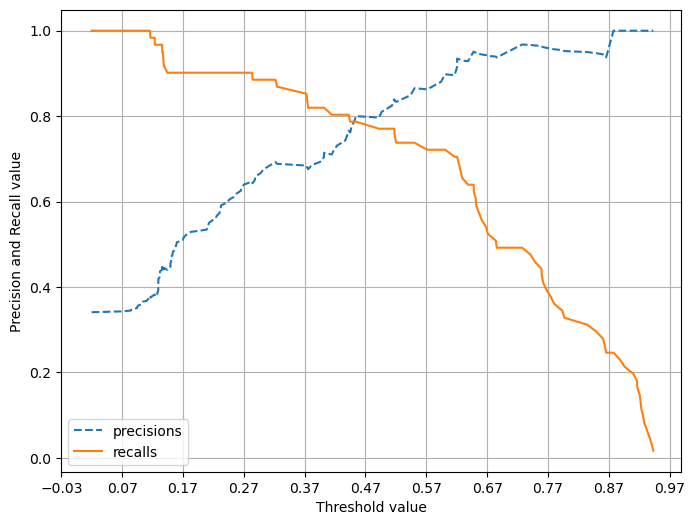

In [213]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds=precision_recall_curve(y_test,pred_proba_c1)

    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precisions')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recalls')
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [215]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print('F1 스코어 {0:.4f}'.format(f1))

F1 스코어 0.7966


In [216]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)

    f1=f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


In [221]:
from sklearn.metrics import roc_curve

pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)

thr_index=np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


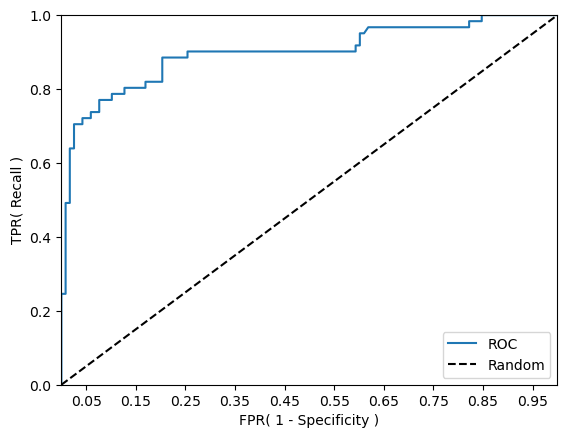

In [222]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [224]:
from sklearn.metrics import roc_auc_score

pred_proba =lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test,pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [1]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
